# 데이터 전처리

* 수치형 데이터 전처리
    * scale 맞추기
    * outlier 처리하기
    * 수치형 데이터를 구간에 따라 범주형 데이터로 변환

# 특성 스케일 맞추기

scikit-learn에서는 다음과 같은 스케일링 클래스를 제공한다.

* StandardScaler(X): 평균이 0과 표준편차가 1이 되도록 변환.
* MinMaxScaler(X): 최대값이 각각 1, 최소값이 0이 되도록 변환

In [1]:
import numpy as np

ex = np.array([0, 1, 2, 3, 4, 5])
print('표준화:', (ex - ex.mean()) / ex.std())
print('정규화:', (ex - ex.min()) / (ex.max() - ex.min()))

표준화: [-1.46385011 -0.87831007 -0.29277002  0.29277002  0.87831007  1.46385011]
정규화: [0.  0.2 0.4 0.6 0.8 1. ]


# 사이킷런 StandardScaler
사용방법은 다음과 같다.

* (1)`fit` : 학습용 데이터의 분포 추정, 학습용 데이터를 입력으로 하여 fit 메서드를 실행하면 분포 모수를 객체내에 저장 
* (2)`transform` : 학습용 데이터 변환, 학습용 데이터를 입력으로 하여 transform 메서드를 실행하면 학습용 데이터를 변환 
* (3)`fit_transform` : (1)번과 (2)번 과정을 합쳐서 fit_transform 메서드를 사용할 수도 있다.
* 학습용 데이터에는 fit_transform()메서드를 적용하고, 테스트 데이터에는 transform()메서드를 적용

train data와 test data가 다른 스케일로 조정되면 훈련된 모형이 test data를 잘못 인식하여 정확한 성능 평가가 이루어지지 않는다. 따라서 train data와 test data는 같은 비율로 전처리 되어야 한다.


In [12]:
from sklearn.preprocessing import StandardScaler


X_train = np.array([0, 1, 2, 3, 4, 5])
X_test = np.array([0,10,20,30,40,50])
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train.reshape(-1,1))
X_test_std = scaler.transform(X_test.reshape(-1,1))

print(X_train_std)
print(X_test_std)

[[-1.46385011]
 [-0.87831007]
 [-0.29277002]
 [ 0.29277002]
 [ 0.87831007]
 [ 1.46385011]]
[[-1.46385011]
 [ 4.39155033]
 [10.24695077]
 [16.1023512 ]
 [21.95775164]
 [27.81315208]]


# 스케일 조정 효과

데이터의 스케일을 조정하면 조정하지 않을때 보다 학습이 잘 이루어져 모형의 정확도가 향상된다.

In [15]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    stratify=cancer.target, random_state=0)
print(X_train.shape)


(426, 30)


사이킷런에서 제공하는 유방암 데이터셋에는 스케일이 매우 다른 특성변수가 있다.

['mean perimeter' 'mean area']


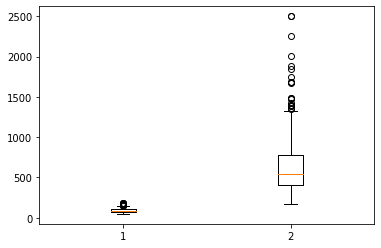

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

print(cancer.feature_names[[2,3]])

plt.boxplot(X_train[:,2:4])
plt.show()

### 데이터 스케일 조정을 하지 않는 경우

In [30]:
from sklearn.svm import SVC

svc = SVC(gamma='auto')
svc.fit(X_train, y_train)
print('test accuracy: %.3f'%(svc.score(X_test, y_test)))

test accuracy: 0.629


### 데이터 스케일을 조정한 경우

In [31]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

svc.fit(X_train_scale, y_train)

print('test accuracy: %.3f'%(svc.score(X_test_scale, y_test)))

test accuracy: 0.951


데이터의 스케일을 조정하여 모형의 성능이 개선되었다.

# Outlier 처리하기

* 통계적으로 outlier, 특이치는 다른 관측치와 크게 다른 데이터 포인트를 말한다.
* 특이치는 통계 분석에 문제를 일으킬 수 있다.(평균과 표준편차에 영향을 줌)


### 이상치 확인하기
* [-1.5 * IQR ~ 1.5*IQR] 의 구간에서 벗어나 있는 경우
* 백분위 수에서 5th ~ 95th 범위에서 벗어나는 경우

In [1]:
import pandas as pd
import numpy as np

In [2]:
# outlier를 포함한 임의의 데이터
x = pd.Series([23,1,3,5,34,6,32,7,45,34,78])
x.describe()

count    11.000000
mean     24.363636
std      23.589289
min       1.000000
25%       5.500000
50%      23.000000
75%      34.000000
max      78.000000
dtype: float64

보통 통계적으로 [-1.5 * IQR ~ 1.5*IQR] 의 구간에서 벗어나 있는 경우를 outlier라고 한다.

In [3]:
# 이상치의 인덱스 값을 리턴하는 함수를 만든다. 

def idx_of_outliers(x):
    q1, q3 = np.percentile(x, [25,75])
    IQR = q3 - q1
    lower_bound = q1 - [IQR * 1.5]
    upper_bound = q3 + [IQR * 1.5]
    return np.where((x > upper_bound) | (x < lower_bound))


In [4]:
idx_of_outliers(x.values)

(array([10], dtype=int64),)

백분위 수에서 5th ~ 95th 범위에서 벗어나는 경우를 outlier로 할 수도 있다.

In [5]:
print('5th percentile: ', x.quantile(q=0.05))
print('95th percentile: ', x.quantile(q=0.95))

5th percentile:  2.0
95th percentile:  61.5


In [6]:
x[(x < x.quantile(q=0.05)) | (x > x.quantile(q=0.95))]

1      1
10    78
dtype: int64

### outlier  처리하기
* outliers의 값을 제거
* 자연로그를 취해서 값을 감소시키는 방법 등으로 변환


In [7]:
houses = pd.DataFrame()
houses['Price'] = [534433, 392333, 293222, 4322032]
houses['Bedrooms'] = [2, 3.5, 2, 116]
houses['Square_Feets'] = [1500, 2500, 1500, 48000]
houses

,Price,Bedrooms,Square_Feets
0,534433,2.0,1500
1,392333,3.5,2500
2,293222,2.0,1500
3,4322032,116.0,48000


outlier를 처리하는 가장 간단한 방법은 outlier를 삭제하는 것이다.

In [8]:
houses.describe()

,Price,Bedrooms,Square_Feets
count,4.000000e+00,4.000000,4.000000
mean,1.385505e+06,30.875000,13375.000000
std,1.960186e+06,56.754405,23088.146309
min,2.932220e+05,2.000000,1500.000000
25%,3.675552e+05,2.000000,1500.000000
50%,4.633830e+05,2.750000,2000.000000
75%,1.481333e+06,31.625000,13875.000000
max,4.322032e+06,116.000000,48000.000000


In [9]:
q1 = houses['Bedrooms'].quantile(0.25)                 
q3 = houses['Bedrooms'].quantile(0.75)
iqr = q3 - q1
# Apply filter with respect to IQR
filter = (houses['Bedrooms'] >= q1 - 1.5*iqr) & (houses['Bedrooms'] <= q3 + 1.5*iqr)
houses.loc[filter] 

,Price,Bedrooms,Square_Feets
0,534433,2.0,1500
1,392333,3.5,2500
2,293222,2.0,1500


outlier의 영향이 줄어들도록 column을 변환한다.

In [10]:
# 로그변환
houses['Log_Square_Feets'] = [np.log(x) for x in houses['Square_Feets']]
houses

,Price,Bedrooms,Square_Feets,Log_Square_Feets
0,534433,2.0,1500,7.313220
1,392333,3.5,2500,7.824046
2,293222,2.0,1500,7.313220
3,4322032,116.0,48000,10.778956


### 결론
* outlier의 확인 및 처리 방법에는 정답이 없다. 
* 여러가지 방법을 고려하여 적절한 방법을 선택한다.


# 연속형 수치 데이터의 이산형화(Discretize)

* 수치적 데이터를 개별적인 구간으로 나눈다.
* 이산형화를 통하여 수치 특성을 범주형 데이터로 변환할 수 있다.
* 이산형화(discretization)은 연속형 변수를 2개 이상의 범주(category)를 가지는 변수로 변환해주는 것을 말한다.


## Binning

수치형 데이터를 범주형 데이터로 변환할 수 있다.  숫자데이터를 카테고리화 하는 기능을 가지고 있다.
* pd.cut() : 나누는 구간의 경계값을 지정하여 구간을 나눈다.
* pd.qcut() : 구간 경계선을 지정하지 않고 데이터 갯수가 같도록 지정한 수의 구간으로 나눈다. 



In [41]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]
bins = [18, 25, 35, 60, 100]

### pd.cut() - 동일 길이로 나누어서 범주 만들기(equal-length buckets categorization)

* pd.cut()함수는 인자로 (카테고리화 숫자데이터, 구간의 구분값)를 넣어 쉽게 카테고리화 할 수 있다.
* pd.cut()함수로 잘린 데이터는 카테고리 자료형 Series로 반환되게 된다.


ages가 5개의 구간 분값에 의해 4구간의 카테고리 자료형으로 반환된다.

In [42]:
# 18 ~ 25 / 25 ~ 35 / 35 ~ 60 / 60 ~ 100 이렇게 총 4구간
cats = pd.cut(ages,bins)
cats

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

cats.codes 를 통해, ages의 각 성분이 몇번째 구간에 속해있는지 정수index처럼 표시되는 것을 알 수 있다.  
 20은 0=첫번째 구간에, 27은 1=두번째 구간에 속한다는 것을 알 수 있다.

In [43]:
cats.codes

array([0, 0, 0, 1, 0, 0, 2, 1, 3, 2, 2, 1], dtype=int8)

cats.value_counts() 를 통해서, 값x 각 구간에 따른 성분의 갯수를 확인할 수 있다.  
value_counts()는 카테고리 자료형(Series)에서 각 구간에 속한 성분의 갯수도 파악할 수 있다.

In [44]:
cats.value_counts()

(18, 25]     5
(25, 35]     3
(35, 60]     3
(60, 100]    1
dtype: int64

 pd.cut()을 호출시, labes = [ 리스트]형식으로 인자를 추가하면 각 카테고리명을 직접 지정해 줄 수 있다.

In [48]:
group_names = ["Youth", "YoungAdult", "MiddleAged", "Senior"]

pd.cut(ages, bins, labels= group_names)

[Youth, Youth, Youth, YoungAdult, Youth, ..., YoungAdult, Senior, MiddleAged, MiddleAged, YoungAdult]
Length: 12
Categories (4, object): [Youth < YoungAdult < MiddleAged < Senior]

#### pd.cut() 구간의 개수로 나누기
2번째 인자에서 각 구간 구분값(bins)이 리스트형식으로 넣어줬던 것을 –>
나눌 구간의 갯수만 입력해준다.  
(성분의 최소값 ~ 최대값를 보고 동일 간격으로 구간을 나눈다.)

In [64]:
import numpy as np

data = np.random.rand(20)
data

array([0.01151654, 0.08489604, 0.13273552, 0.77069924, 0.30712367,
       0.52751617, 0.87232724, 0.06763211, 0.63793124, 0.46247029,
       0.42941492, 0.16516972, 0.41835361, 0.9408463 , 0.65019111,
       0.97424579, 0.60060685, 0.27364627, 0.15431855, 0.57369417])

In [66]:
# 20개의 data성분에 대해, 동일한 길이의 구간으로 4개를 나누었고, 
# 기준은 소수2번째 자리까지를 기준으로 한다.
pd.cut(data, 4, precision = 2 )

[(0.011, 0.25], (0.011, 0.25], (0.011, 0.25], (0.73, 0.97], (0.25, 0.49], ..., (0.73, 0.97], (0.49, 0.73], (0.25, 0.49], (0.011, 0.25], (0.49, 0.73]]
Length: 20
Categories (4, interval[float64]): [(0.011, 0.25] < (0.25, 0.49] < (0.49, 0.73] < (0.73, 0.97]]

### pd.qcut() - 동일 개수로 나누어서 범주 만들기 (equal-size buckets categorization)

pandas에서는 qcut이라는 함수도 제공한다.  
* 지정한 갯수만큼 구간을 정의한다. 
* pd.cut() 함수는 최대값 쵯소값만 고려해서 구간을 나눈 것에 비해
* pd.qcut() 함수는 데이터 분포를 고려하여 각 구간에 동일한 양의 데이터가 들어가도록 분위 수를 구분값으로 구간을 나누는 함수다.

In [53]:
data2 = np.random.randn(100)
data2

array([ 0.07095008, -0.28460341, -1.1113178 , -0.46064165,  0.29755175,
       -0.14465886, -0.38970629,  0.15637227,  0.0930421 , -0.64750559,
       -1.35338068, -0.87789751, -0.16446036, -1.2284163 ,  0.79399828,
       -0.0986112 , -0.53979637,  0.60120078,  0.84113324, -0.59075662,
       -2.63405623,  0.84687628,  0.3657227 , -1.30073757, -1.09361804,
        0.36392042, -0.7421156 , -0.07018914, -0.88991558,  0.35655254,
       -2.31540819,  1.30243755,  0.61987412,  0.31261493, -0.73515476,
       -0.06419485, -2.31949037,  0.64464294,  0.79415647,  0.71466014,
       -0.75980899,  1.60338082, -0.3107026 , -1.45908298,  1.820238  ,
        0.88263722, -0.62180006,  0.66719326,  0.40984178, -1.58485655,
        1.14359054, -1.79395456,  1.77910843, -0.66423495,  1.03885404,
       -0.31954981,  2.13922388,  0.51627027,  0.58441777, -0.9717766 ,
        0.9760148 , -1.01139416,  1.32686224,  0.6390049 , -0.4795768 ,
       -0.49000739, -1.99251677,  0.97939676, -0.90858316, -0.30

In [54]:
cats = pd.qcut(data2, 4)

* cats = pd.qcut(data2, 4)를 통해 4개의 구간을 나눈다.
* 최소값<—>최대값 사이를 4등분 하는 것이 아니라, 분포까지 고려해서 4분위로 나눈 다음, 구간을 결정하게 된다.
* cut함수와 달리, 각 구간의 길이가 동일하다고 말할 수 없다.

In [55]:
cats

[(-0.0905, 0.666], (-0.737, -0.0905], (-2.6439999999999997, -0.737], (-0.737, -0.0905], (-0.0905, 0.666], ..., (0.666, 2.139], (-0.737, -0.0905], (-0.0905, 0.666], (-0.0905, 0.666], (-0.0905, 0.666]]
Length: 100
Categories (4, interval[float64]): [(-2.6439999999999997, -0.737] < (-0.737, -0.0905] < (-0.0905, 0.666] < (0.666, 2.139]]